In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

# #TODO
- 3 stacje
- maksymalna suma dobowa w roku
- maksymalne sumy dobowe miesięczne
- sumy miesięczne
- suma roczna
- (+) dane surowe przygotowane
- temperatura średnia miesięczna / roczna
- przygotować dane dobowe

- [SWMM](https://www.epa.gov/system/files/documents/2022-04/swmm-users-manual-version-5.2.pdf)

https://danepubliczne.imgw.pl/data/dane_pomiarowo_obserwacyjne/dane_meteorologiczne/miesieczne/klimat/k_m_d_format.txt

In [6]:
data_path = "../data/IMGW/"
df_kmd = pd.read_csv(data_path+"kmd.csv",index_col=0)
df_kmd

,Kod stacji,Nazwa stacji,Rok,Miesiąc,Absolutna temperatura maksymalna [°C],Status pomiaru TMAX,Średnia temperatura maksymalna [°C],Status pomiaru TMXS,Absolutna temperatura minimalna [°C],Status pomiaru TMIN,...,Status pomiaru SUMM,Maksymalna dobowa suma opadów [mm],Status pomiaru OPMX,Pierwszy dzień wystapienia opadu maksymalnego,Ostatni dzień wystąpienia opadu maksymalnego,Maksymalna wysokość pokrywy śnieżnej [cm],Status pomiaru PKSN,Liczba dni z pokrywą śnieżną,Liczba dni z opadem deszczu,Liczba dni z opadem śniegu
0,249200180,LIMANOWA,1952,1,7.8,NaN,2.3,NaN,-17.0,NaN,...,NaN,10.8,NaN,21.0,NaN,19,NaN,22,3,16
1,249200180,LIMANOWA,1952,2,4.7,NaN,0.3,NaN,-17.0,NaN,...,NaN,15.1,NaN,26.0,NaN,62,NaN,29,2,23
2,249200180,LIMANOWA,1952,3,10.6,NaN,1.7,NaN,-22.5,NaN,...,NaN,17.7,NaN,26.0,NaN,60,NaN,31,2,16
3,249200180,LIMANOWA,1952,4,25.6,NaN,16.0,NaN,-10.7,NaN,...,NaN,12.2,NaN,25.0,NaN,38,NaN,7,7,2
4,249200180,LIMANOWA,1952,5,24.3,NaN,15.6,NaN,-2.4,NaN,...,NaN,11.8,NaN,24.0,NaN,0,NaN,0,14,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,254220090,OLECKO,2023,5,24.8,NaN,18.3,NaN,0.2,NaN,...,NaN,5.2,NaN,15.0,17.0,0,NaN,0,6,0
471,254220090,OLECKO,2023,6,30.0,NaN,23.2,NaN,3.5,NaN,...,NaN,16.6,NaN,21.0,NaN,0,NaN,0,12,0
472,254220090,OLECKO,2023,7,33.3,NaN,23.9,NaN,9.8,NaN,...,NaN,7.3,NaN,21.0,NaN,0,NaN,0,16,0
473,254220090,OLECKO,2023,8,33.4,NaN,25.7,NaN,9.3,NaN,...,NaN,19.8,NaN,29.0,NaN,0,NaN,0,14,0


#### Checking which stations fit GDAŃSK or GDYNIA pattern

In [8]:
unq = df_kmd["Nazwa stacji"].unique()
unq = unq[np.array(list(map(lambda seq: (lambda p,seq: True if re.match(p, seq) else False)(r"(GDAŃSK|GDYNIA)", seq),unq)))]
unq

array(['GDYNIA', 'GDAŃSK-ŚWIBNO', 'GDAŃSK-RĘBIECHOWO'], dtype=object)

#### Check station code consistency
Code which changed indicates that the station was displaced. Add date span for more info.

In [57]:
tmp_df = df_kmd.loc[map(lambda x: any(x==unq),df_kmd["Nazwa stacji"]),
          ["Nazwa stacji", "Kod stacji", "Rok"]].groupby(["Nazwa stacji", "Kod stacji"]).agg(["min","max",lambda x:np.all(np.diff(np.unique(x))==1)])
tmp_df.columns = [("Rok","min"),("Rok","max"),("Rok","pomiar ciągły?")]
tmp_df

(Rok, min)  (Rok, max)  (Rok, pomiar ciągły?)
Nazwa stacji      Kod stacji                                               
GDAŃSK-RĘBIECHOWO 254180090         1991        2023                  False
                  354180150         1951        1999                  False
GDAŃSK-ŚWIBNO     254180110         1951        2012                  False
GDYNIA            254180060         1951        2015                   True

In [25]:
station_gd_r = 'GDAŃSK-RĘBIECHOWO'
code_gd_r = 254180090

station_gd_sw = 'GDAŃSK-ŚWIBNO'
code_gd_sw = 254180110

station_gdy = 'GDYNIA' 
code_gdy = 254180060

### Gdańsk Rębiechowo

In [26]:
df_gd_r =  df_kmd.loc[df_kmd["Kod stacji"]==code_gd_r]
df_gd_r.head()

,Kod stacji,Nazwa stacji,Rok,Miesiąc,Absolutna temperatura maksymalna [°C],Status pomiaru TMAX,Średnia temperatura maksymalna [°C],Status pomiaru TMXS,Absolutna temperatura minimalna [°C],Status pomiaru TMIN,...,Status pomiaru SUMM,Maksymalna dobowa suma opadów [mm],Status pomiaru OPMX,Pierwszy dzień wystapienia opadu maksymalnego,Ostatni dzień wystąpienia opadu maksymalnego,Maksymalna wysokość pokrywy śnieżnej [cm],Status pomiaru PKSN,Liczba dni z pokrywą śnieżną,Liczba dni z opadem deszczu,Liczba dni z opadem śniegu
11010,254180090,GDAŃSK-RĘBIECHOWO,1991,1,11.8,NaN,3.4,NaN,-15.7,NaN,...,NaN,3.5,NaN,29.0,NaN,4,NaN,4,8,8
11011,254180090,GDAŃSK-RĘBIECHOWO,1991,2,8.0,NaN,-1.0,NaN,-15.3,NaN,...,NaN,6.3,NaN,13.0,NaN,32,NaN,26,2,13
11012,254180090,GDAŃSK-RĘBIECHOWO,1991,3,15.5,NaN,7.2,NaN,-5.4,NaN,...,NaN,7.1,NaN,19.0,NaN,3,NaN,4,10,1
11013,254180090,GDAŃSK-RĘBIECHOWO,1991,4,18.7,NaN,11.4,NaN,-5.1,NaN,...,NaN,3.9,NaN,19.0,NaN,2,NaN,1,4,6
11014,254180090,GDAŃSK-RĘBIECHOWO,1991,5,20.9,NaN,12.1,NaN,0.1,NaN,...,NaN,12.9,NaN,3.0,NaN,0,NaN,0,18,0


In [27]:
df_gd_r["Rok"].unique()

array([1991, 1992, 1993, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2020, 2021, 2022, 2023], dtype=int64)

In [ ]:
df_gd_r

### Gdańsk Świbno

In [13]:
df_gd_sw =  df_kmd.loc[df_kmd["Kod stacji"]==code_gd_sw]
df_gd_sw.head()

,Kod stacji,Nazwa stacji,Rok,Miesiąc,Absolutna temperatura maksymalna [°C],Status pomiaru TMAX,Średnia temperatura maksymalna [°C],Status pomiaru TMXS,Absolutna temperatura minimalna [°C],Status pomiaru TMIN,...,Status pomiaru SUMM,Maksymalna dobowa suma opadów [mm],Status pomiaru OPMX,Pierwszy dzień wystapienia opadu maksymalnego,Ostatni dzień wystąpienia opadu maksymalnego,Maksymalna wysokość pokrywy śnieżnej [cm],Status pomiaru PKSN,Liczba dni z pokrywą śnieżną,Liczba dni z opadem deszczu,Liczba dni z opadem śniegu
2123,254180110,GDAŃSK-ŚWIBNO,1951,1,6.2,NaN,0.4,NaN,-16.1,NaN,...,NaN,5.1,NaN,15.0,NaN,8,NaN,9,5,14
2124,254180110,GDAŃSK-ŚWIBNO,1951,2,6.1,NaN,1.7,NaN,-11.8,NaN,...,NaN,16.3,NaN,27.0,NaN,15,NaN,1,5,6
2125,254180110,GDAŃSK-ŚWIBNO,1951,3,9.4,NaN,2.6,NaN,-14.7,NaN,...,NaN,9.7,NaN,23.0,NaN,24,NaN,14,5,10
2126,254180110,GDAŃSK-ŚWIBNO,1951,4,24.3,NaN,12.7,NaN,-0.5,NaN,...,NaN,6.2,NaN,28.0,NaN,0,NaN,0,7,0
2127,254180110,GDAŃSK-ŚWIBNO,1951,5,19.9,NaN,12.6,NaN,0.1,NaN,...,NaN,4.8,NaN,15.0,NaN,0,NaN,0,8,0


In [14]:
df_gd_sw["Rok"].unique()

array([1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961,
       1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972,
       1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012],
      dtype=int64)

### Gdynia

In [15]:
df_gdy =  df_kmd.loc[df_kmd["Kod stacji"]==code_gdy]
df_gdy.head()

,Kod stacji,Nazwa stacji,Rok,Miesiąc,Absolutna temperatura maksymalna [°C],Status pomiaru TMAX,Średnia temperatura maksymalna [°C],Status pomiaru TMXS,Absolutna temperatura minimalna [°C],Status pomiaru TMIN,...,Status pomiaru SUMM,Maksymalna dobowa suma opadów [mm],Status pomiaru OPMX,Pierwszy dzień wystapienia opadu maksymalnego,Ostatni dzień wystąpienia opadu maksymalnego,Maksymalna wysokość pokrywy śnieżnej [cm],Status pomiaru PKSN,Liczba dni z pokrywą śnieżną,Liczba dni z opadem deszczu,Liczba dni z opadem śniegu
2063,254180060,GDYNIA,1951,1,7.3,NaN,1.2,NaN,-12.8,NaN,...,NaN,4.6,NaN,20.0,NaN,4,NaN,8,5,13
2064,254180060,GDYNIA,1951,2,7.9,NaN,2.2,NaN,-9.6,NaN,...,NaN,9.8,NaN,27.0,NaN,13,NaN,1,3,8
2065,254180060,GDYNIA,1951,3,10.1,NaN,3.2,NaN,-9.4,NaN,...,NaN,13.6,NaN,18.0,NaN,25,NaN,15,6,12
2066,254180060,GDYNIA,1951,4,24.7,NaN,12.7,NaN,-1.9,NaN,...,NaN,6.7,NaN,3.0,NaN,0,NaN,0,7,0
2067,254180060,GDYNIA,1951,5,17.2,NaN,12.3,NaN,1.6,NaN,...,NaN,4.5,NaN,14.0,NaN,0,NaN,0,8,0


In [16]:
df_gdy["Rok"].unique()

array([1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961,
       1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972,
       1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
       1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994,
       1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
      dtype=int64)

### Opad normalny Gdynia
Utworzenie ramki zawierającego roczne sumy opadu

In [17]:
df_gdy_op = df_gdy[["Rok","Miesieczna suma opadów  [mm]"]].groupby("Rok").sum()
df_gdy_op.columns=["Roczna suma opadów [mm]"]
df_gdy_op.drop([2015],inplace=True) # drop last year - 2015 as it is incomplete
df_gdy_op

,Roczna suma opadów [mm]
Rok,
1951,364.9
1952,681.6
1953,370.3
1954,624.0
1955,552.0
...,...
2010,758.2
2011,386.8
2012,599.1


In [18]:
df_gdy_agg = df_gdy_op.rolling(30).agg(["mean","median"]).dropna()
df_gdy_agg.head()

Roczna suma opadów [mm]        
                        mean  median
Rok                                 
1980              549.433333  557.65
1981              557.976667  560.20
1982              546.266667  557.65
1983              553.290000  560.20
1984              549.940000  557.65

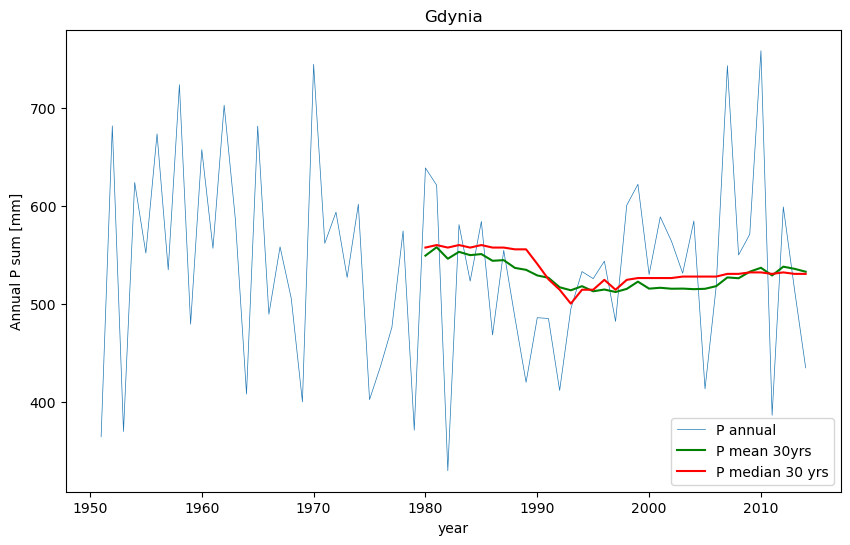

In [19]:
xp = df_gdy_op.index.to_numpy()
Pp = df_gdy_op["Roczna suma opadów [mm]"].to_numpy()

x = df_gdy_agg.index.to_numpy()
P_mean = df_gdy_agg[('Roczna suma opadów [mm]', 'mean')].to_numpy()
P_median = df_gdy_agg[('Roczna suma opadów [mm]', 'median')].to_numpy()

plt.figure(figsize=(10,6))
plt.plot(xp,Pp,linewidth=0.5)
plt.plot(x,P_mean,c="green")
plt.plot(x,P_median,c="red")
plt.legend(["P annual","P mean 30yrs", "P median 30 yrs"])
plt.xlabel("year")
plt.ylabel("Annual P sum [mm]")
plt.title("Gdynia")
pass

### Opad normalny - Gdańsk Świbno

In [20]:
df_gd_sw_op = df_gd_sw[["Rok","Miesieczna suma opadów  [mm]"]].groupby("Rok").sum()
df_gd_sw_op.columns=["Roczna suma opadów [mm]"]
df_gd_sw_op.head()

,Roczna suma opadów [mm]
Rok,
1951,296.3
1952,628.3
1953,437.9
1954,486.0
1955,480.7


In [21]:
df_gd_sw_agg = df_gd_sw_op.rolling(30).agg(["mean","median"]).dropna()
df_gd_sw_agg.head()

Roczna suma opadów [mm]        
                        mean  median
Rok                                 
1980              545.836667  538.95
1981              559.240000  540.35
1982              549.886667  538.95
1983              539.493333  538.95
1992              539.380000  538.95

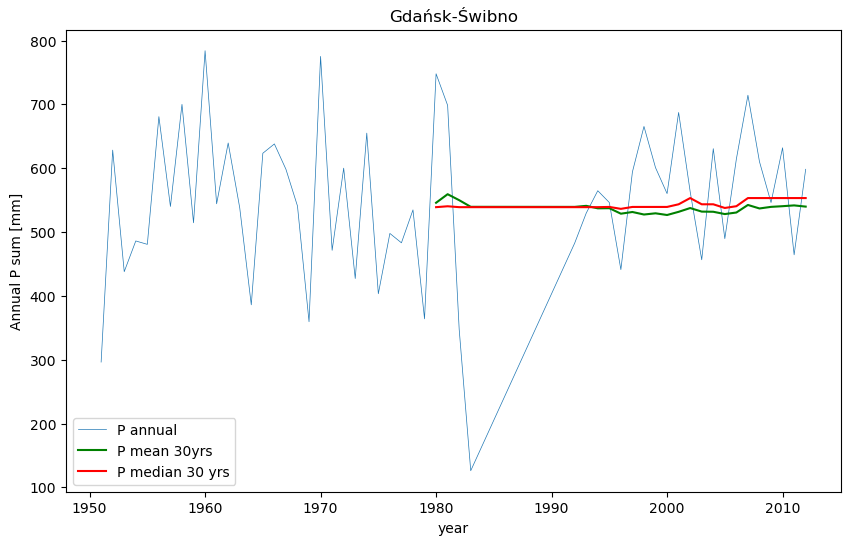

In [22]:
xp = df_gd_sw_op.index.to_numpy()
Pp = df_gd_sw_op["Roczna suma opadów [mm]"].to_numpy()

x = df_gd_sw_agg.index.to_numpy()
P_mean = df_gd_sw_agg[('Roczna suma opadów [mm]', 'mean')].to_numpy()
P_median = df_gd_sw_agg[('Roczna suma opadów [mm]', 'median')].to_numpy()

plt.figure(figsize=(10,6))
plt.plot(xp,Pp,linewidth=0.5)
plt.plot(x,P_mean,c="green")
plt.plot(x,P_median,c="red")
plt.legend(["P annual","P mean 30yrs", "P median 30 yrs"])
plt.xlabel("year")
plt.ylabel("Annual P sum [mm]")
plt.title("Gdańsk-Świbno")
pass

### opad normalny Gdańsk-Rębiechowo

In [28]:
df_gd_r_op = df_gd_r[["Rok","Miesieczna suma opadów  [mm]"]].groupby("Rok").sum()
df_gd_r_op.columns=["Roczna suma opadów [mm]"]
df_gd_r_op.head()

,Roczna suma opadów [mm]
Rok,
1991,497.7
1992,489.4
1993,515.7
2000,573.6
2001,806.7


In [30]:
df_gd_r_agg = df_gd_r_op.rolling(30).agg(["mean","median"]).dropna()
df_gd_r_agg.head()

Empty DataFrame
Columns: [(Roczna suma opadów [mm], mean), (Roczna suma opadów [mm], median)]
Index: []

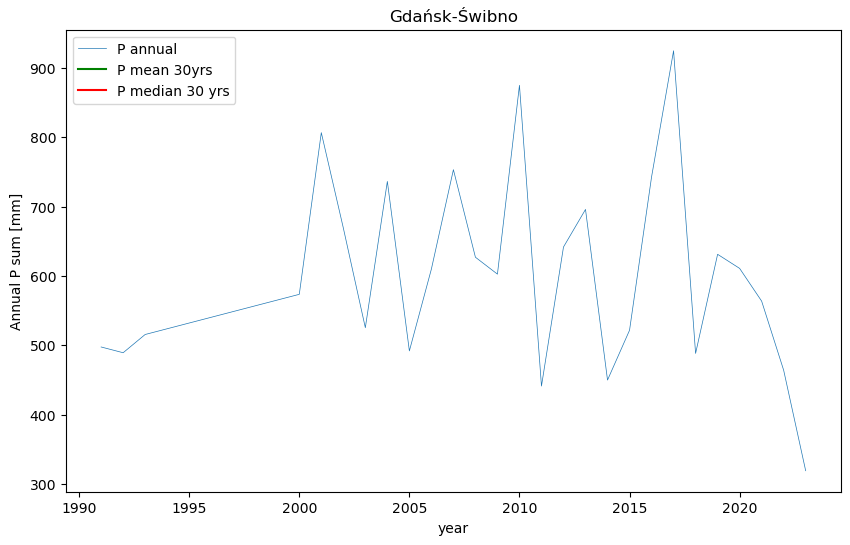

In [149]:
xp = df_gd_r_op.index.to_numpy()
Pp = df_gd_r_op["Roczna suma opadów [mm]"].to_numpy()

x = df_gd_r_agg.index.to_numpy()
P_mean = df_gd_r_agg[('Roczna suma opadów [mm]', 'mean')].to_numpy()
P_median = df_gd_r_agg[('Roczna suma opadów [mm]', 'median')].to_numpy()

plt.figure(figsize=(10,6))
plt.plot(xp,Pp,linewidth=0.5)
plt.plot(x,P_mean,c="green")
plt.plot(x,P_median,c="red")
plt.legend(["P annual","P mean 30yrs", "P median 30 yrs"])
plt.xlabel("year")
plt.ylabel("Annual P sum [mm]")
plt.title("Gdańsk-Rębiechowo")
pass

In [7]:
page = requests.get("https://danepubliczne.imgw.pl/data/dane_pomiarowo_obserwacyjne/dane_meteorologiczne/miesieczne/klimat/")
soup = BeautifulSoup(page.content, "html.parser")
type(soup.find('table'))

bs4.element.Tag

In [5]:
import requests